#TSP Heuristiques

**Projet réalisé par Myriam Bloch, Berouria Meguira, Tsiporah Adler et Esther Kats**

Dans ce notebook Jupyter, nous commencerons par définir l'ensemble des fonctions nécessaires, avant de passer à une seconde partie dédiée à l'exécution principale du code, où ces fonctions seront appelées.




### Définition des fonctions

In [ ]:
import random
import matplotlib.pyplot as plt
import time
import math
import heapq

```
def generer_villes()
```
Génère aléatoirement n villes dans un rectangle de dimensions données.

  Paramètres :
  - ```n (int)``` : nombre de villes à générer.
  - ```largeur (float) ``` : largeur maximale du plan (par défaut 100).
  - ```hauteur (float)``` : hauteur maximale du plan (par défaut 100).

  Retour :
  - ```List[Tuple[float, float]]``` : liste des coordonnées ```(x, y)``` des villes générées.

In [ ]:
def generer_villes(n, largeur=100, hauteur=100):

    villes = []
    for i in range(n):
        x = random.uniform(0, largeur)
        y = random.uniform(0, hauteur)
        villes.append((x, y))
    return villes

```def afficher_villes()```

Affiche les villes sur un plan 2D avec leurs indices.

Paramètres :
- ```villes (List[Tuple[float, float]])``` : liste des coordonnées des villes.
    
Retour :
- Aucun (affichage graphique via matplotlib).

In [ ]:
def afficher_villes(villes):

    xs, ys = zip(*villes)
    plt.figure(figsize=(6,6))
    plt.scatter(xs, ys, color='blue')
    for i, (x, y) in enumerate(villes):
        plt.text(x + 1, y + 1, str(i), fontsize=9)
    plt.title("Carte des villes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

```def calculer_matrice_distances():```

Calcule la matrice des distances euclidiennes entre chaque paire de villes.

Paramètres :
- ```villes (List[Tuple[float, float]])``` : liste des coordonnées des villes.

Retour :
- ```List[List[float]]``` : matrice des distances entre les villes.

In [ ]:
def calculer_matrice_distances(villes):

    n = len(villes)
    distances = [[0.0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                xi, yi = villes[i]
                xj, yj = villes[j]
                distances[i][j] = math.dist((xi, yi), (xj, yj))
    return distances

```def nearest_neighbor()```

Résout le problème du TSP à l’aide de l’algorithme du plus proche voisin.

Paramètres :
- ```villes (List[Tuple[float, float]])``` : liste des coordonnées des villes.
- ```distances (List[List[float]])``` : matrice des distances entre les villes.

Retour :
- ```chemin (List[int])``` : ordre des villes visitées (terminé par un retour au départ).
- ```total_distance (float)``` : distance totale du circuit.
- ```execution_time (float)``` : durée d’exécution de l’algorithme en secondes.

In [ ]:
def nearest_neighbor(villes, distances):

    start_time = time.time()

    n = len(villes)
    visited = [False] * n
    chemin = [0]  # Commence à la ville 0
    visited[0] = True
    total_distance = 0

    current = 0
    for _ in range(n - 1):
        next_city = None
        min_dist = float('inf')
        for j in range(n):
            if not visited[j] and distances[current][j] < min_dist:
                next_city = j
                min_dist = distances[current][j]
        chemin.append(next_city)
        total_distance += min_dist
        visited[next_city] = True
        current = next_city

    # Retour à la ville de départ
    total_distance += distances[current][0]
    chemin.append(0)

    execution_time = time.time() - start_time
    return chemin, total_distance, execution_time

```def insertion_heuristique()```

Résout le problème du TSP en utilisant l’heuristique d’insertion.

Paramètres :
- ```villes (List[Tuple[float, float]])``` : liste des coordonnées des villes.
- ```distances (List[List[float]])``` : matrice des distances entre les villes.

Retour :
- ```tour (List[int])``` : ordre des villes visitées, commençant et terminant à la même ville.
- ```total_distance (float)``` : distance totale du circuit.
- ```execution_time (float)``` : durée d’exécution de l’algorithme en secondes.

In [ ]:
def insertion_heuristique(villes, distances):

    start_time = time.time()
    n = len(villes)

    non_visitees = list(range(n))
    tour = [0, 1, 0]  # On commence avec les villes 0 → 1 → 0
    non_visitees.remove(0)
    non_visitees.remove(1)

    while non_visitees:
        meilleur_cout = float('inf')
        meilleure_ville = None
        meilleure_position = None

        for ville in non_visitees:
            for i in range(1, len(tour)):
                a = tour[i - 1]
                b = tour[i]
                cout = distances[a][ville] + distances[ville][b] - distances[a][b]
                if cout < meilleur_cout:
                    meilleur_cout = cout
                    meilleure_ville = ville
                    meilleure_position = i

        tour.insert(meilleure_position, meilleure_ville)
        non_visitees.remove(meilleure_ville)

    # Calcul de la distance totale
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i]][tour[i + 1]]

    execution_time = time.time() - start_time
    return tour, total_distance, execution_time

```def comparer_heuristiques()```

Compare les deux heuristiques (Nearest Neighbor et Insertion) sur un même ensemble de villes.

Affiche pour chaque méthode :
- la distance totale du circuit
- le temps d'exécution
- le ratio par rapport à une borne inférieure estimée (via MST)

Paramètres :
- ```villes (List[Tuple[float, float]])``` : liste des coordonnées des villes.
- ```distances (List[List[float]])``` : matrice des distances.

Retour :
- Aucun (affiche les résultats et les tracés).

In [ ]:
def comparer_heuristiques(villes, distances):

     # Exécution des heuristiques
    chemin_nn, dist_nn, t_nn = nearest_neighbor(villes, distances)
    chemin_ins, dist_ins, t_ins = insertion_heuristique(villes, distances)

    # Calcul de la borne inférieure avec l'arbre couvrant minimal (MST)
    borne = mst_borne_inferieure(distances)

    # Calcul des ratios distance / borne inférieure
    qualite_nn = dist_nn / borne
    qualite_ins = dist_ins / borne

    # Affichage des résultats
    print("🔹 Nearest Neighbor")
    print(f"  Distance totale : {dist_nn:.2f}")
    print(f"  Temps d'exécution : {t_nn:.4f} s\n")
    print(f"  ➤ Ratio distance / borne : {qualite_nn:.2f}\n")

    print("🔹 Insertion Heuristique")
    print(f"  Distance totale : {dist_ins:.2f}")
    print(f"  Temps d'exécution : {t_ins:.4f} s\n")
    print(f"  ➤ Ratio distance / borne : {qualite_ins:.2f}\n")

    print(f" Borne inférieure estimée (MST) : {borne:.2f}")

    # Visualisation du chemin
    afficher_chemin(villes, chemin_nn, titre="Nearest Neighbor", couleur='blue', distance=dist_nn)
    afficher_chemin(villes, chemin_ins, titre="Heuristique d'Insertion", couleur='green', distance=dist_ins)

```def afficher_chemin()```

Affiche un chemin TSP sur la carte des villes.

Paramètres :
- ```villes (List[Tuple[float, float]])``` : coordonnées des villes.
- ```chemin (List[int])``` : ordre des villes visitées.
- ```titre (str)``` : titre du graphique (facultatif).
- ```couleur (str)``` : couleur de la ligne du chemin.
- ```distance (float)``` : distance totale affichée dans le titre (facultatif).

Retour :
- Aucun (affichage graphique via matplotlib).

In [ ]:
def afficher_chemin(villes, chemin, titre="Circuit", couleur='blue', distance=None):

    xs = [villes[i][0] for i in chemin]
    ys = [villes[i][1] for i in chemin]

    plt.figure(figsize=(8, 6))
    plt.scatter(*zip(*villes), c='black', zorder=2)
    plt.plot(xs, ys, c=couleur, zorder=1, linewidth=2, label="Chemin")

    for i, (x, y) in enumerate(villes):
        plt.text(x + 1, y + 1, str(i), fontsize=9)

    titre_complet = f"{titre} – Distance : {distance:.2f}" if distance else titre
    plt.title(titre_complet)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

```def mst_borne_inferieure():```

Calcule une borne inférieure pour le TSP à l'aide de l'arbre couvrant minimal (MST) via l’algorithme de Prim.

Paramètres :
- ```distances (List[List[float]])``` : matrice des distances entre les villes.

Retour :
- ```total (float)``` : poids total de l’arbre couvrant minimal (borne inférieure pour le TSP).


In [ ]:
def mst_borne_inferieure(distances):

    n = len(distances)
    visited = [False] * n
    min_edge = [float('inf')] * n
    min_edge[0] = 0
    heap = [(0, 0)]
    total = 0

    while heap:
        cout, u = heapq.heappop(heap)
        if visited[u]:
            continue
        visited[u] = True
        total += cout

        for v in range(n):
            if not visited[v] and distances[u][v] < min_edge[v]:
                min_edge[v] = distances[u][v]
                heapq.heappush(heap, (distances[u][v], v))

    return total

### Execution principale

In [ ]:
if __name__ == "__main__":
    villes = generer_villes(15)
    afficher_villes(villes)
    distances = calculer_matrice_distances(villes)
    comparer_heuristiques(villes, distances)

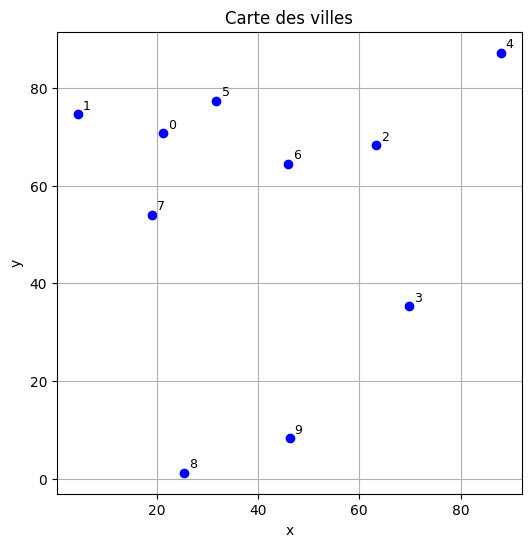

[0.0, 17.167929071081627, 42.272755842826996, 60.10078339706163, 68.7408200225182, 12.50857483537801, 25.536708814961315, 16.81732382167452, 69.6514976424884, 67.24951490188417]
[17.167929071081627, 0.0, 59.264962444566144, 76.19608113890678, 84.40934027100856, 27.46927931753986, 42.70265629608414, 25.237825724834067, 76.31968332727965, 78.35887512877923]
[42.272755842826996, 59.264962444566144, 0.0, 33.56034795468513, 30.978885673845316, 32.8748997768599, 17.85213851998266, 46.525131947156204, 77.10518430351682, 62.339095105412305]
[60.10078339706163, 76.19608113890678, 33.56034795468513, 0.0, 54.95017658038964, 56.6379298905959, 37.6360379388387, 54.0060448052328, 55.993329636775954, 35.77599793220604]
[68.7408200225182, 84.40934027100856, 30.978885673845316, 54.95017658038964, 0.0, 56.98916142842199, 47.7312273190027, 76.39734939533322, 106.3374545473699, 89.17671952480346]
[12.50857483537801, 27.46927931753986, 32.8748997768599, 56.6379298905959, 56.98916142842199, 0.0, 19.13958901

In [ ]:
# Import des fonctions utiles
from tsp_utils import generer_villes, afficher_villes, calculer_matrice_distances

# Génération de 10 villes aléatoires
villes = generer_villes(10)

# Affichage des villes sur un plan
afficher_villes(villes)

# Calcul de la matrice des distances euclidiennes
distances = calculer_matrice_distances(villes)

# Affichage de la matrice des distances
for row in distances:
    print(row)


In [ ]:
from tsp_utils import generer_villes, calculer_matrice_distances, nearest_neighbor

for n in [10, 20, 50, 100]:
    print(f"\n--- Test avec {n} villes ---")
    villes = generer_villes(n)
    distances = calculer_matrice_distances(villes)
    chemin, total, temps = nearest_neighbor(villes, distances)

    print("Chemin trouvé :", chemin)
    print("Distance totale :", round(total, 2))
    print("Temps d'exécution :", round(temps, 4), "secondes")



--- Test avec 10 villes ---
Chemin trouvé : [0, 7, 8, 1, 5, 6, 4, 9, 3, 2, 0]
Distance totale : 287.14
Temps d'exécution : 0.0 secondes

--- Test avec 20 villes ---
Chemin trouvé : [0, 14, 9, 17, 7, 12, 5, 15, 19, 1, 8, 18, 3, 6, 16, 2, 10, 11, 13, 4, 0]
Distance totale : 337.53
Temps d'exécution : 0.0 secondes

--- Test avec 50 villes ---
Chemin trouvé : [0, 24, 10, 7, 48, 49, 40, 31, 39, 29, 2, 33, 34, 32, 19, 44, 43, 18, 27, 5, 1, 45, 25, 13, 14, 37, 8, 3, 42, 47, 36, 41, 35, 26, 28, 15, 30, 22, 16, 38, 23, 4, 20, 46, 21, 12, 11, 9, 6, 17, 0]
Distance totale : 715.59
Temps d'exécution : 0.0 secondes

--- Test avec 100 villes ---
Chemin trouvé : [0, 91, 23, 72, 4, 11, 74, 37, 82, 62, 66, 64, 18, 71, 68, 30, 8, 47, 96, 14, 57, 28, 25, 63, 55, 50, 85, 92, 41, 20, 39, 3, 52, 24, 93, 38, 6, 75, 81, 98, 34, 43, 12, 53, 94, 80, 70, 15, 48, 86, 49, 42, 51, 73, 32, 26, 19, 83, 59, 84, 87, 99, 44, 36, 13, 1, 95, 97, 7, 77, 65, 21, 40, 89, 31, 35, 27, 22, 2, 29, 33, 54, 5, 78, 60, 9, 76, 45, 